In [1]:
#importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
#cargamos los datos
df = pd.read_csv('Coderfinal.csv')
df.info
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


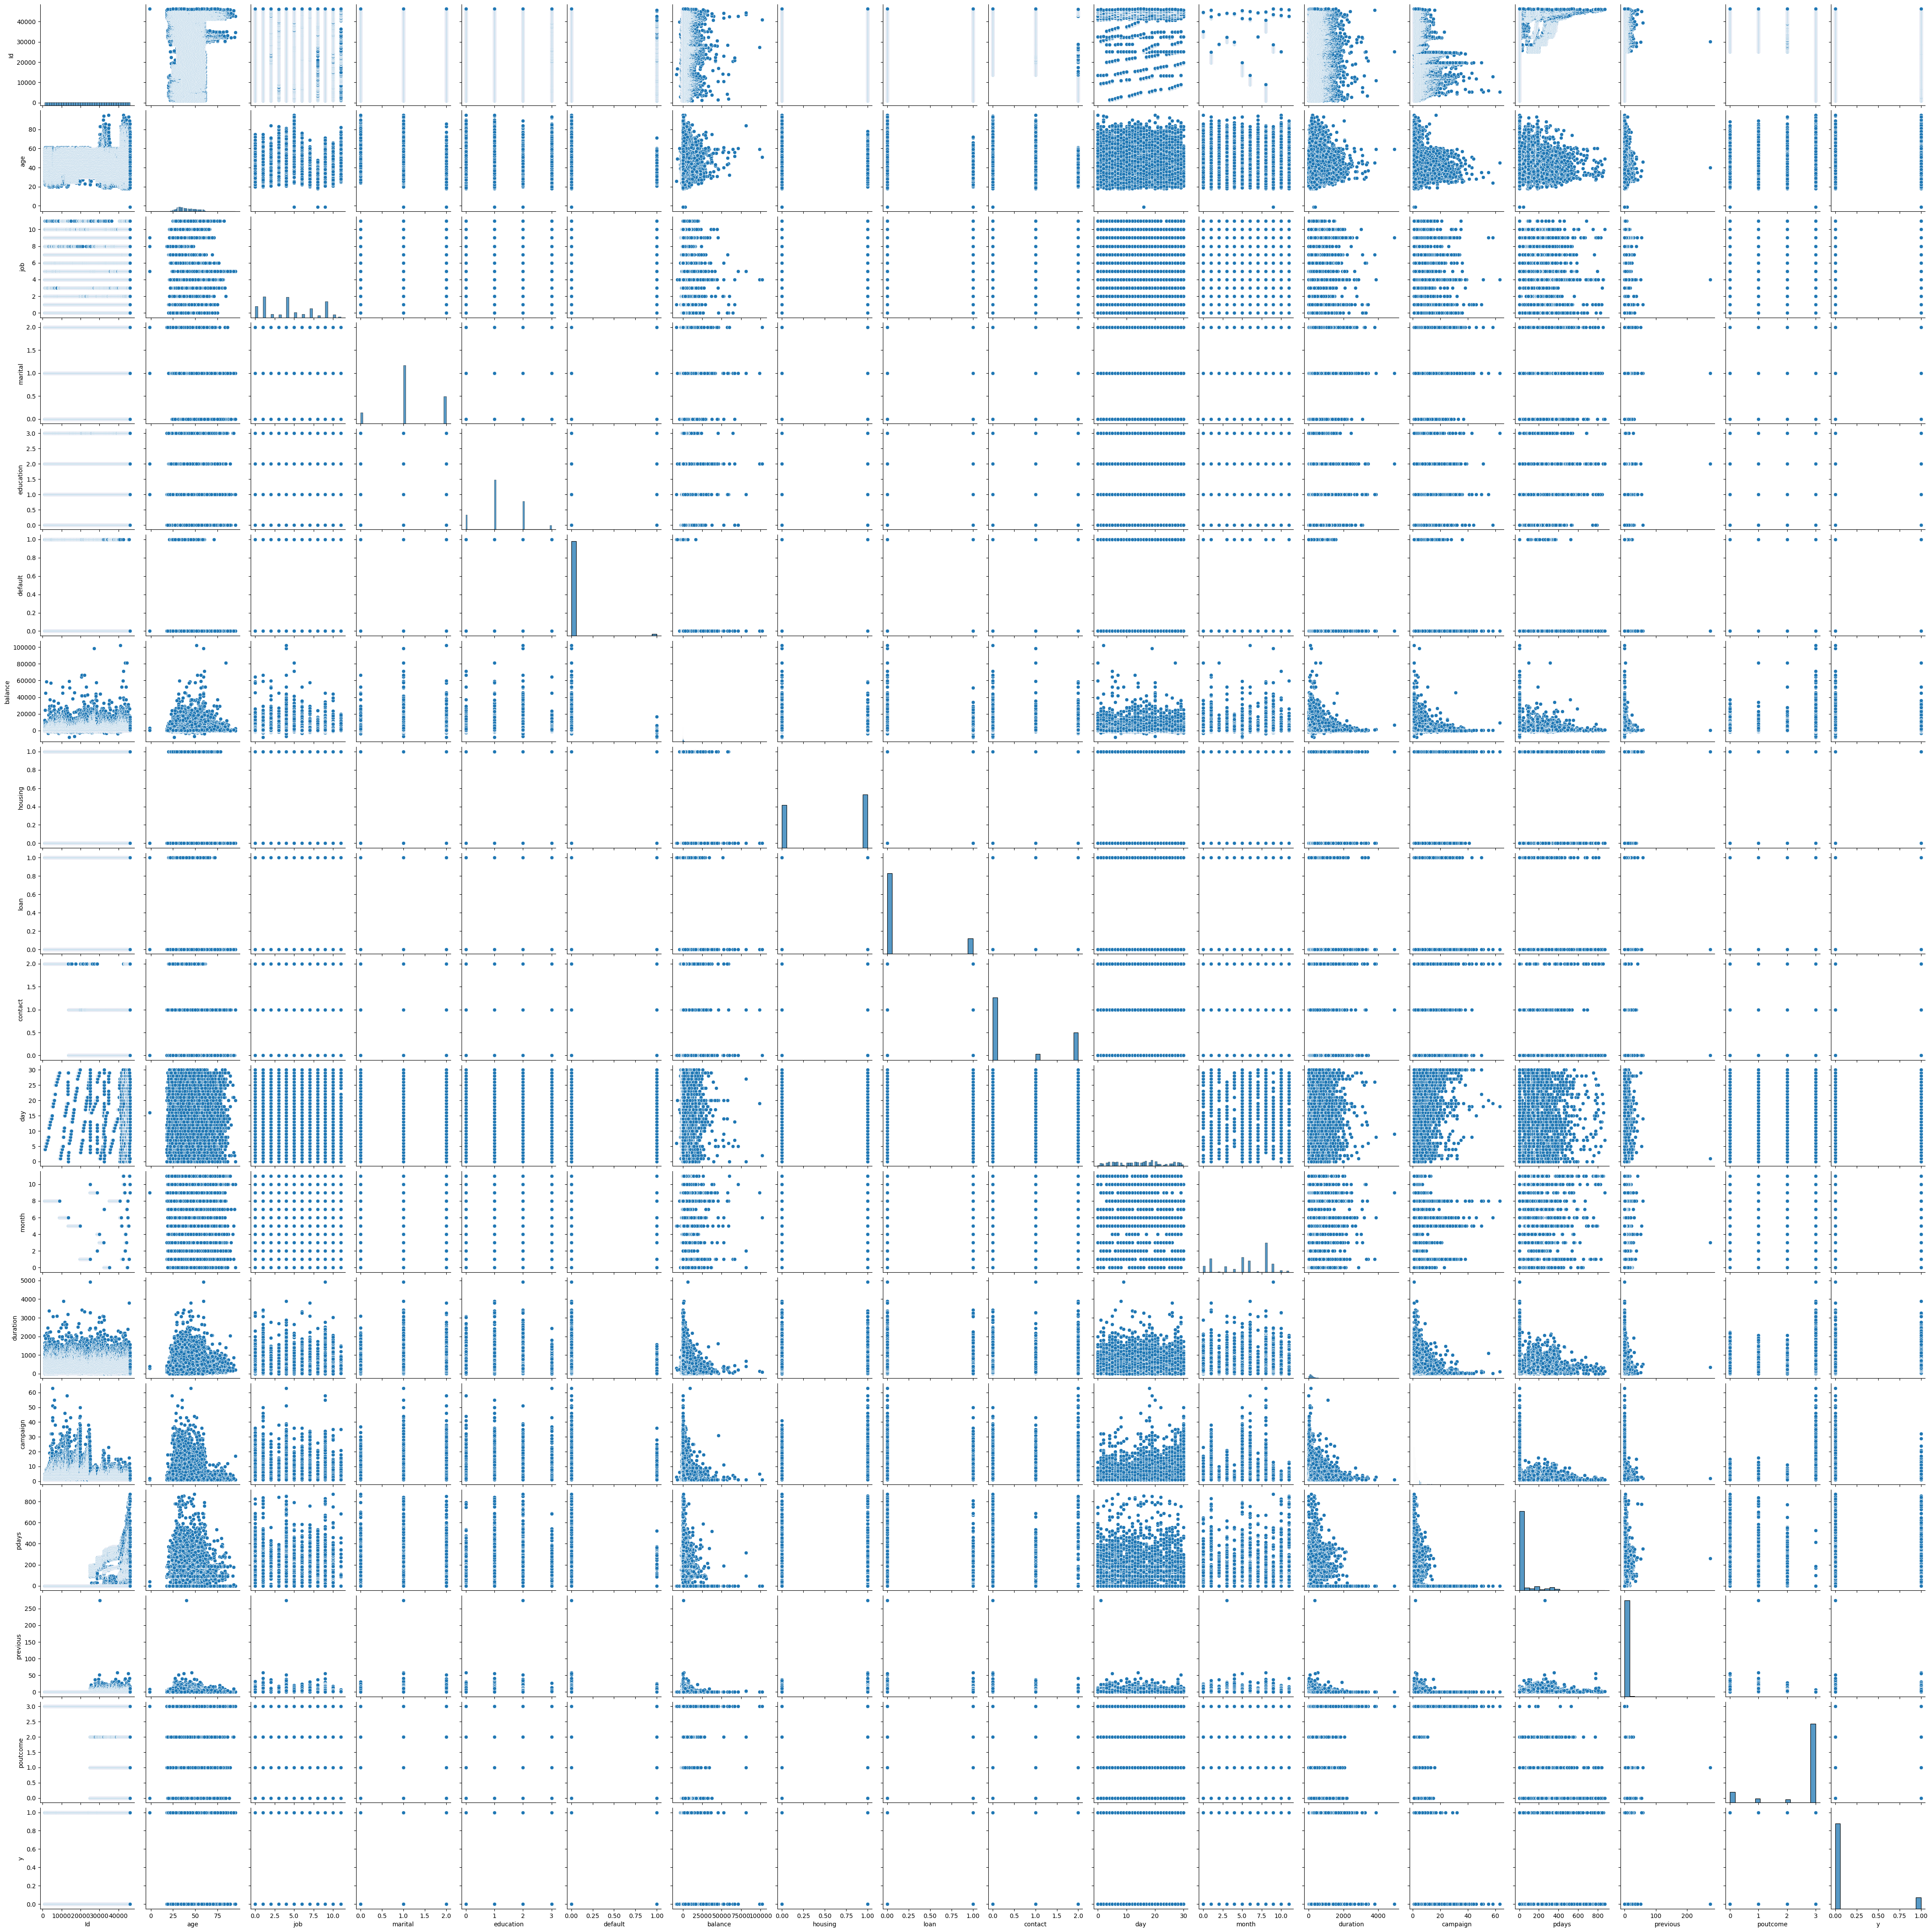

In [ ]:
# EDA
sns.pairplot(df)
plt.show()

In [3]:
# Limpieza de datos
# Eliminar filas donde la edad es mayor a 99
df = df[df['age'] <= 99]

# Reemplazar valores 'blank' en la columna balance con 0 y convertir a float
df['balance'] = df['balance'].replace('blank', 0).astype(float)

# Reemplazar valores -1 en la columna pdays con 0
df['pdays'] = df['pdays'].replace(-1, 0)

# Calcular la edad promedio de las filas restantes
mean_age = df['age'].mean()

# Reemplazar valores faltantes en la columna age con la edad promedio
df['age'].fillna(mean_age, inplace=True)

# Renombrar la columna 'y' a 'subscribed'
df.rename(columns={'y': 'subscribed'}, inplace=True)

<ipython-input-3-f2bf028ceb15>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance'] = df['balance'].replace('blank', 0).astype(float)
<ipython-input-3-f2bf028ceb15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pdays'] = df['pdays'].replace(-1, 0)
<ipython-input-3-f2bf028ceb15>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [4]:
# Identificar todas las columnas categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'subscribed']

# Codificación de variables categóricas
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

<ipython-input-4-3df7f8729313>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-4-3df7f8729313>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-4-3df7f8729313>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [5]:
# Verificar si hay valores faltantes en el DataFrame
print("Valores faltantes en el DataFrame:\n", df.isnull().sum())

Valores faltantes en el DataFrame:
 Id            0
age           0
job           0
marital       0
education     0
default       0
balance       2
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [6]:
# Imputar valores faltantes en todas las columnas numéricas
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Verificar si todavía hay valores faltantes
print("Valores faltantes después de la imputación:\n", df.isnull().sum())

Valores faltantes después de la imputación:
 Id            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [8]:
# División de datos para clasificación
X = df.drop(['Id', 'subscribed'], axis=1)  # 'subscribed' es la variable objetivo
y = df['subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clasificación con Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [9]:
# Predicciones
y_pred = rf.predict(X_test)

In [10]:
# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9029974560336246
Confusion Matrix:
 [[7704  246]
 [ 631  460]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7950
           1       0.65      0.42      0.51      1091

    accuracy                           0.90      9041
   macro avg       0.79      0.70      0.73      9041
weighted avg       0.89      0.90      0.89      9041



In [11]:
# Optimización de hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)

Best Params: {'max_depth': 20, 'n_estimators': 300}


In [12]:
# Escalado de datos para clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


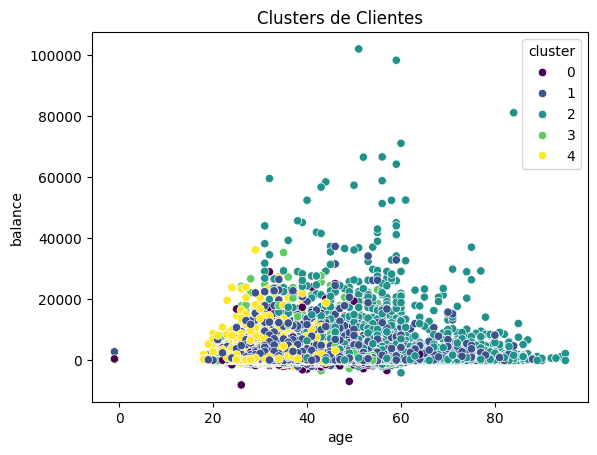

In [13]:
# Clustering con K-means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir clusters al dataframe original
df['cluster'] = clusters

# Visualización de clusters
sns.scatterplot(x=df['age'], y=df['balance'], hue=df['cluster'], palette='viridis')
plt.title('Clusters de Clientes')
plt.show()